# **Automatidata project**
<img src='Automatidata.png'>

## Project scenario
### Background
Automatidata,  a fictional data consulting firm, works with its clients to transform their unused and stored data into useful solutions, such as performance dashboards, customer-facing tools, strategic business insights, and more. They specialize in identifying a client’s business needs and utilizing their data to meet those business needs. 

Automatidata is consulting for the New York City Taxi and Limousine Commission (TLC). New York City TLC is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles. The agency has partnered with Automatidata to **develop a regression model that helps estimate taxi fares before the ride**, based on data that TLC has gathered. 

The TLC data comes from over 200,000 taxi and limousine licensees, making approximately one million combined trips per day. 

**Note:** _This project's dataset was created for pedagogical purposes and may not be indicative of New York City taxi cab riders' behavior._

### Data dictionary
This project uses a dataset called [2017_Yellow_Taxi_Trip_Data.csv](2017_Yellow_Taxi_Trip_Data.csv). It contains data gathered by the New York City Taxi & Limousine Commission. For each trip, there are many different data variables gathered. 

The dataset contains:

**22,699 rows** – each row represents a different trip

**18 columns**

|**Column name**|**Description**|
|---|---|
|ID|Trip identification number|
|VendorID|A code indicating the TPEP provider that provided the record. <br><br>**1= Creative Mobile Technologies, LLC;**<br><br>**2= VeriFone Inc.**|
|tpep_pickup_datetime|The date and time when the meter was engaged.|
|tpep_dropoff_datetime|The date and time when the meter was disengaged.|
|Passenger_count|The number of passengers in the vehicle.  <br><br>This is a driver-entered value.|
|Trip_distance|The elapsed trip distance in miles reported by the taximeter.|
|PULocationID|TLC Taxi Zone in which the taximeter was engaged|
|DOLocationID|TLC Taxi Zone in which the taximeter was disengaged|
|RatecodeID|The final rate code in effect at the end of the trip. <br><br>**1= Standard rate** <br><br>**2=JFK** <br><br>**3=Newark** <br><br>**4=Nassau or Westchester** <br><br>**5=Negotiated fare** <br><br>**6=Group ride**|
|Store_and_fwd_flag|This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor, aka “store and forward,”  because the vehicle did not have a connection to the server. <br><br>**Y= store and forward trip** <br><br>**N= not a store and forward trip**|
|Payment_type|A numeric code signifying how the passenger paid for the trip. <br><br>**1= Credit card** <br><br>**2= Cash** <br><br>**3= No charge** <br><br>**4= Dispute** <br><br>**5= Unknown** <br><br>**6= Voided trip**|
|Fare_amount|The time-and-distance fare calculated by the meter.|
|Extra|Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.|
|MTA_tax|$0.50 MTA tax that is automatically triggered based on the metered rate in use.|
|Improvement_surcharge|$0.30 improvement surcharge assessed trips at the flag drop. The  improvement surcharge began being levied in 2015.|
|Tip_amount|Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.|
|Tolls_amount|Total amount of all tolls paid in trip.|
|Total_amount|The total amount charged to passengers. Does not include cash tips.|


## Exploratory data analysis
### Imports packages & load dataset

In [79]:
# Import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [80]:
# Load dataset into a dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Display first few rows of the dataframe
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


### Data exploration & Data cleaning
#### Gather basic information and descriptive statistics about the data

In [81]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

The dataset has no missing data. Next we check for duplicates.

In [82]:
# Check for duplicates
print('Total count of duplicates:', df.duplicated(keep=False)[0].sum())

Total count of duplicates: 0


The purpose of our project is to develop a regression model that helps estimate taxi fares before the ride. From the result of `describe()` as well as the data dictionary we have got ealier, there are few points we can note for now:
- `fare_amount` will be our target variable
- `VendorID`, `tpep_pickup_datetime`, `passenger_count`, `PULocationID`, `DOLocationID` are the variables we may use to build the model
- `trip_distance` might be the variable with strongest relationship with `fare_amount` but in reality we do not know it until after the trip is occured so we cannot train our model on this feature. However it would be helpful for our data exploration. Same reason for `RatecodeID` and `payment_type`
- From `tpep_pickup_datetime` and `tpep_dropoff_datetime` we will calculate `trip_duration`, which is valuable for exploration
- Other features are likely irrelevant in our project and would be safe to be dropped.

In [83]:
# convert pickup columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# create new columns from pickup datetime
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# calculate trip_duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds().div(60).astype(int)

# drop irrelevant variables
df.drop(['Unnamed: 0', 'store_and_fwd_flag', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount'], axis=1, inplace=True)
df.shape

(22699, 13)

In [84]:
# Gather descriptive statistics about the data
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,day_of_week,hour,trip_duration
count,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,3.024759,13.726552,16.526984
min,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,0.000000,0.000000,-16.000000
25%,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,1.000000,9.000000,6.000000
50%,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,3.000000,14.000000,11.000000
75%,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,5.000000,19.000000,18.000000
max,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,6.000000,23.000000,1439.000000
std,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,1.951140,6.224675,61.994881


- `fare_amount`, `trip_distance`, `trip_duration` all seem to have outliers
- `fare_amount` and `trip_duration` even have negative values which does not make sense, for now we will drop the records with negative `fare_amount`
- `RatecodeID` also has an unexpected max value of 99

In [85]:
# drop records with negative fare_amount or trip_duration
df = df[~ (df['fare_amount'] < 0)]
df.shape

(22685, 13)

In [86]:
# filter data with unexpected RatecodeID
df[df['RatecodeID'] > 6]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,day_of_week,hour,trip_duration
12501,1,2017-04-18 17:47:58,2017-04-18 17:47:58,0,0.0,99,264,264,1,77.2,1,17,0


There is only one record with `RatecodeID` 99 and both its `trip_distance` and `trip_duration` are equal 0 so it's reasonable for us to drop this row.

In [87]:
df = df[~ (df['RatecodeID'] == 99)]
df.shape

(22684, 13)

Now let's take a closer look at our target variable, `fare_amount`. 

<Axes: xlabel='fare_amount'>

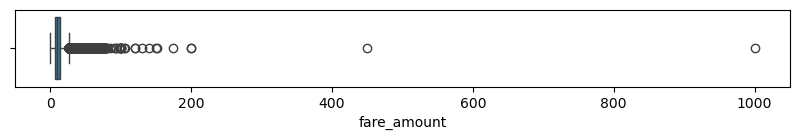

In [88]:
# create boxplot of fare_amount
plt.figure(figsize=(10, 1))
sns.boxplot(df, x='fare_amount')

<Axes: xlabel='fare_amount'>

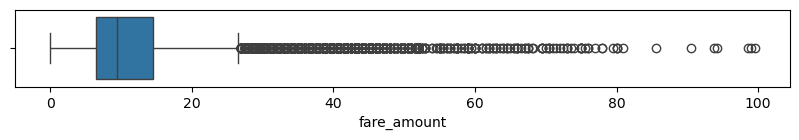

In [89]:
# zoom in the part where fare_amount < 100
plt.figure(figsize=(10, 1))
sns.boxplot(df[df['fare_amount'] < 100], x='fare_amount')

In [90]:
# number of records that have more than $80 fare_amount
df[df['fare_amount'] > 80]['fare_amount'].value_counts()

fare_amount
100.00    4
120.00    2
99.50     1
94.20     1
90.50     1
140.00    1
200.00    1
200.01    1
105.00    1
175.00    1
99.00     1
131.00    1
150.00    1
999.99    1
98.50     1
93.75     1
107.00    1
80.84     1
152.00    1
85.50     1
450.00    1
Name: count, dtype: int64

There are only limited number of fares that bigger than $80. It is safe to drop them when building prediction model.

In [91]:
# drop records with unreasonable fare_amount and trip_duration
df = df[~(df['fare_amount'] > 80)]
df.shape

(22659, 13)

Now let's take another look at `fare_amount` distribution.

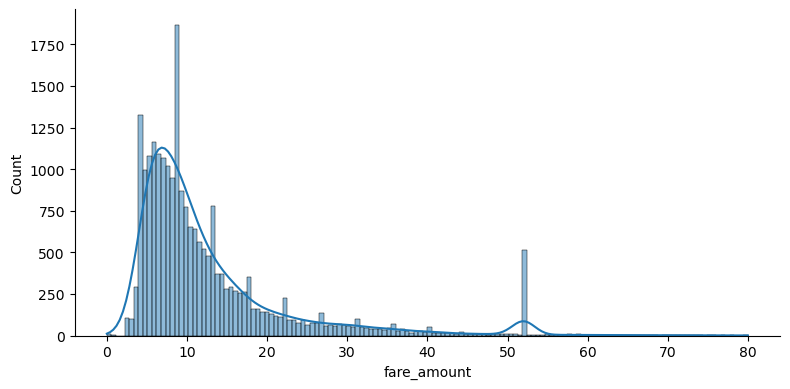

In [92]:
# create histogram of fare_amount
sns.displot(df, x='fare_amount', kde=True, height=4, aspect=2)

There are a significance amount of records that have `fare_amount` around $50. This might be trip with fixed rate. We note this and will investigate further later.

<Axes: xlabel='trip_duration'>

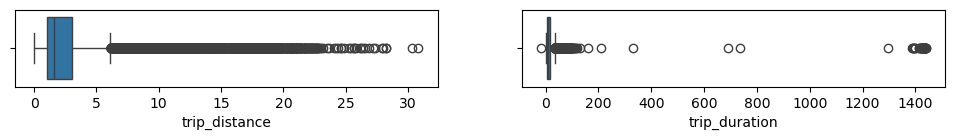

In [93]:
# create boxplot for other variables with outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,1))
sns.boxplot(df, x='trip_distance', ax=ax1)
sns.boxplot(df, x='trip_duration', ax=ax2)

`trip_distance` seem to be okay but let's take closer look at records with `trip_duration` that bigger than 200 minutes or less than 0 minute.

In [94]:
# filter records that trip_duration is more than 200 minutes
df[(df['trip_duration'] >= 200) | (df['trip_duration'] < 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,day_of_week,hour,trip_duration
29,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,132,23,1,80.0,0,20,209
697,2,2017-06-10 21:55:01,2017-06-11 21:45:51,1,1.36,1,264,264,1,8.5,5,21,1430
924,2,2017-02-09 23:24:58,2017-02-10 23:24:31,5,4.86,1,249,238,1,17.5,3,23,1439
1010,2,2017-12-08 07:17:20,2017-12-09 07:07:22,1,0.33,1,161,161,2,4.5,4,7,1430
1199,2,2017-11-12 19:52:44,2017-11-13 19:37:35,1,4.14,1,186,236,1,18.0,6,19,1424
1355,2,2017-04-17 21:26:49,2017-04-18 20:46:13,6,4.09,1,100,13,2,15.0,0,21,1399
1758,2,2017-12-28 23:58:24,2017-12-29 23:38:45,1,1.23,1,163,50,1,7.0,3,23,1420
4600,2,2017-12-20 08:24:34,2017-12-21 07:39:27,4,1.26,1,140,236,2,10.0,2,8,1394
5051,2,2017-08-07 18:27:53,2017-08-08 00:00:00,1,14.35,1,132,33,1,50.5,0,18,332
5370,2,2017-12-13 19:40:05,2017-12-14 19:31:09,3,0.93,1,162,230,1,12.0,2,19,1431


`trip_duration` aside, other variables seem pretty normal. Since `trip_duration` is not the variable we can/will use to build the prediction model, these records will be kept.

#### Analyzing relationships between variables

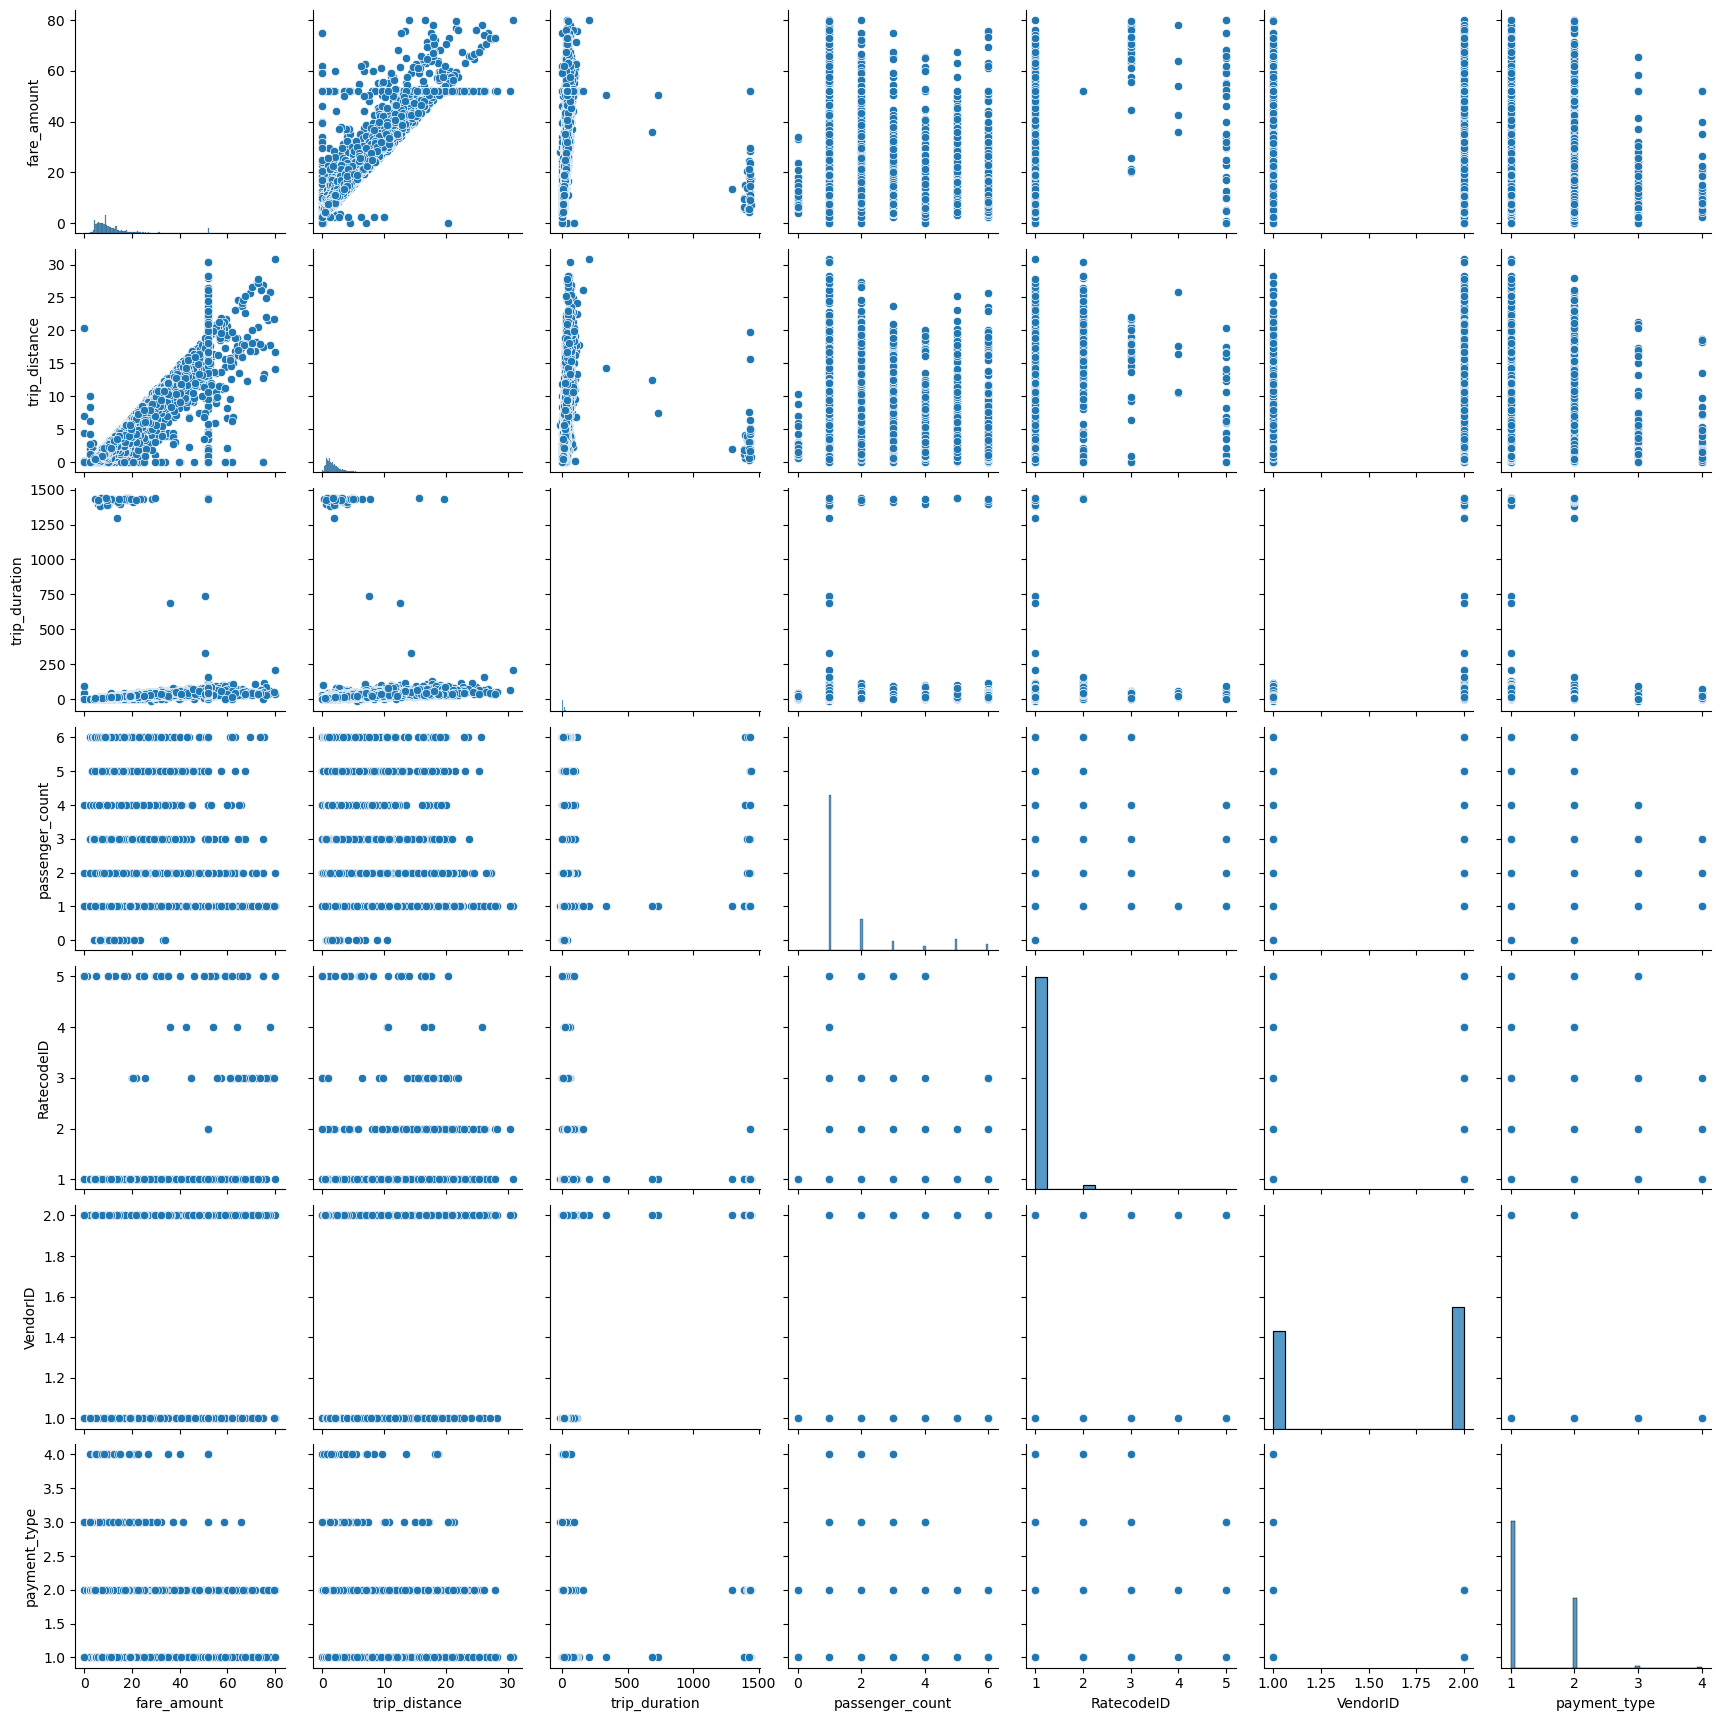

In [95]:
# plot pairplot
sns.pairplot(df[['fare_amount', 'trip_distance', 'trip_duration', 'passenger_count', 'RatecodeID', 'VendorID', 'payment_type']])

Except for some outliers, we can see clear linear relationships between `trip_distance`, `trip_duration` and `fare_amount`. Next let's explore more the ralationship of `fare_amount` and each variable.

<Axes: xlabel='VendorID', ylabel='fare_amount'>

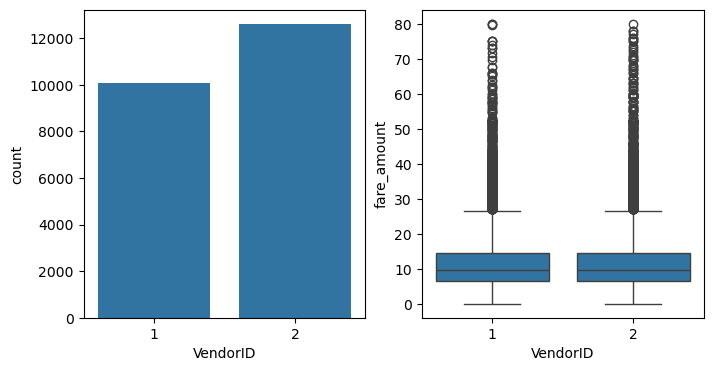

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
sns.countplot(df, x='VendorID', ax=ax1)
sns.boxplot(df, x='VendorID', y='fare_amount', ax=ax2)

<Axes: xlabel='payment_type', ylabel='fare_amount'>

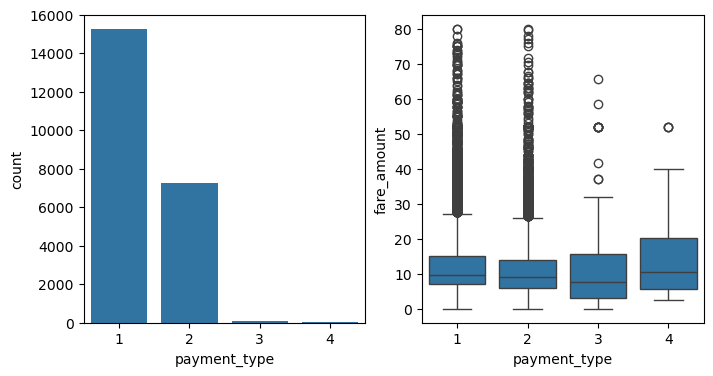

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
sns.countplot(df, x='payment_type', ax=ax1)
sns.boxplot(df, x='payment_type', y='fare_amount', ax=ax2)

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

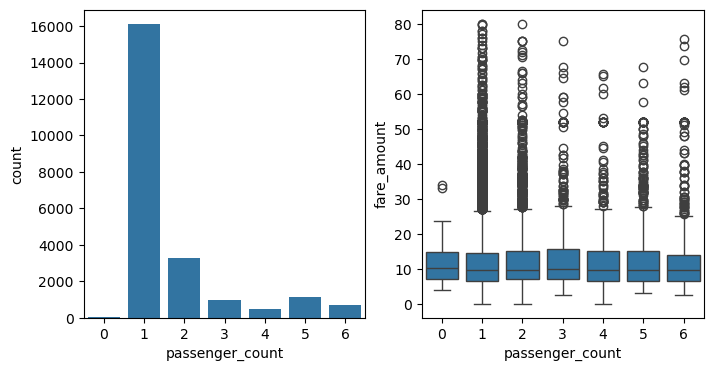

In [98]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
sns.countplot(df, x='passenger_count', ax=ax1)
sns.boxplot(df, x='passenger_count', y='fare_amount', ax=ax2)

<Axes: xlabel='RatecodeID', ylabel='fare_amount'>

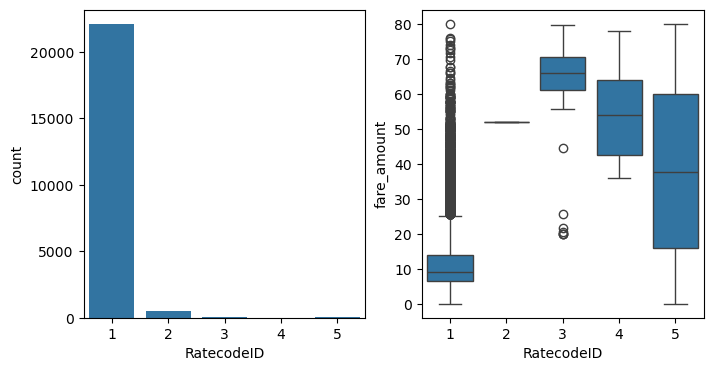

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
sns.countplot(df, x='RatecodeID', ax=ax1)
sns.boxplot(df, x='RatecodeID', y='fare_amount', ax=ax2)

Unlike other variables, `RatecodeID` seems to have a strong realtionship with `fare_amount`. First notable point is that the fixed rate around $50 we see earlier seem to link with the `RatecodeID` 2, which is JFK rate. After a quick search, there is indeed [a flat rate $52 for taxi between JFK (John F. Kennedy International Airport) and Manhattan](https://www.bloomberg.com/news/articles/2022-11-15/nyc-taxi-cab-fares-to-rise-23-in-first-increase-since-2012) in 2017. Let's verify this.

In [100]:
df[df['RatecodeID'] == 2]['fare_amount'].value_counts()

fare_amount
52.0    513
Name: count, dtype: int64

From this [article](https://www.nyc.gov/site/tlc/passengers/taxi-fare.page), we know that `RatecodeID` is due to pickup or dropoff location. Let take a look at the location of each type (except the default 1 - Standard rate).

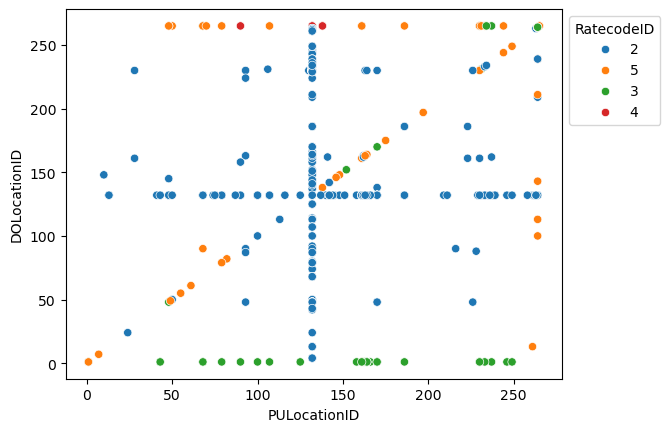

In [101]:
# convert categorical variable to string
df['RatecodeID'] = df['RatecodeID'].astype('string')

# scatter plot pickup and dropoff location based on RatecodeID
ax = sns.scatterplot(df[df['RatecodeID'] != '1'], x='PULocationID', y='DOLocationID', hue='RatecodeID')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In this [website](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page), we can find the information about Taxi Zone Maps and Lookup Tables. Based on all the info gathered, we can note some points about the taxi rate in 2017:
- `RatecodeID` 1 - Standard Metered Fare will have $2.50 initial charge 
- `RatecodeID` 2 is for trips between Manhattan and JFK Airpost (ID #132) and will have flat fare of $52
- `RatecodeID` 3 is for trips to Newark Airport EWR (ID #1) and are charged the standard metered fare
- `RatecodeID` 4 is for trips goes beyond the City limit to Nassau or Westchester (ID #265)
- `RatecodeID` 5 is for trips outside of the city with negotiated rate before the trip. As show in the graph it often have the same `PULocationID`, `DOLocationID` or one of the id is #265 or #264 - Unknown.

For our model it is better to drop trip with `RatecodeID` 2 since they are flat rate and `RatecodeID` 4, 5 since they are negociated fare trips or trips outside of the city which mean we do not have the information about its dropoff location. We will also remove any trips that have `fare_amount` less than $2.50.

In [102]:
# drop trips with flat rate, negatiated fare or have fare smallter than initial charge
df = df[~((df['RatecodeID'].isin(['4', '5', '2'])) | (df['fare_amount'] < 2.5))]
df.shape

(22089, 13)

Now let's take a look at relation between `fare_amount` and `tpep_pickup_datetime`.

<Axes: xlabel='day_of_week', ylabel='fare_amount'>

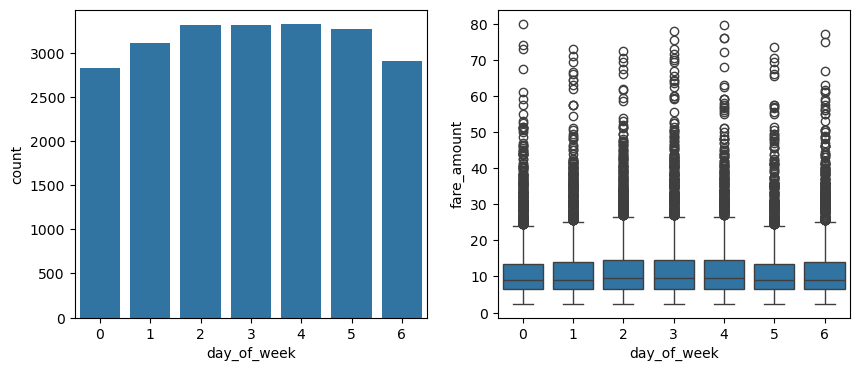

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(df, x='day_of_week', ax=ax1)
sns.boxplot(df, x='day_of_week', y='fare_amount', ax=ax2)

<Axes: xlabel='hour', ylabel='fare_amount'>

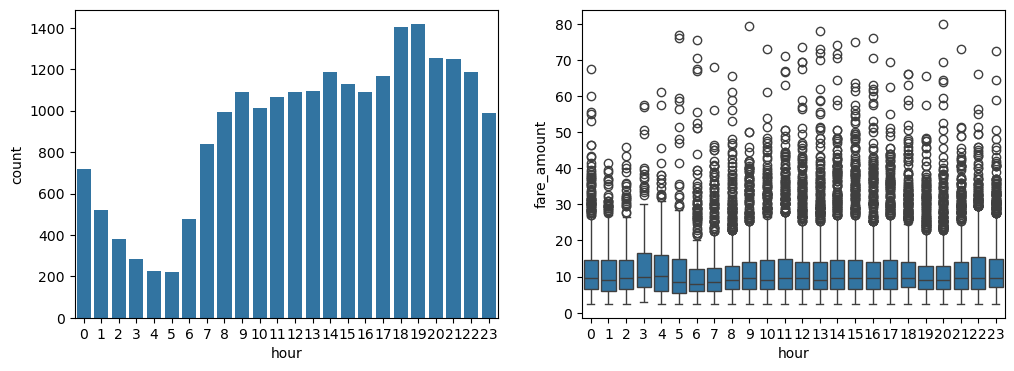

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.countplot(df, x='hour', ax=ax1)
sns.boxplot(df, x='hour', y='fare_amount', ax=ax2)

Let's create `weekday` column and plot to see the difference in partern of trip in weekday and weekend.

c:\ProgramData\miniconda3\envs\dataanalysis\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\ProgramData\miniconda3\envs\dataanalysis\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


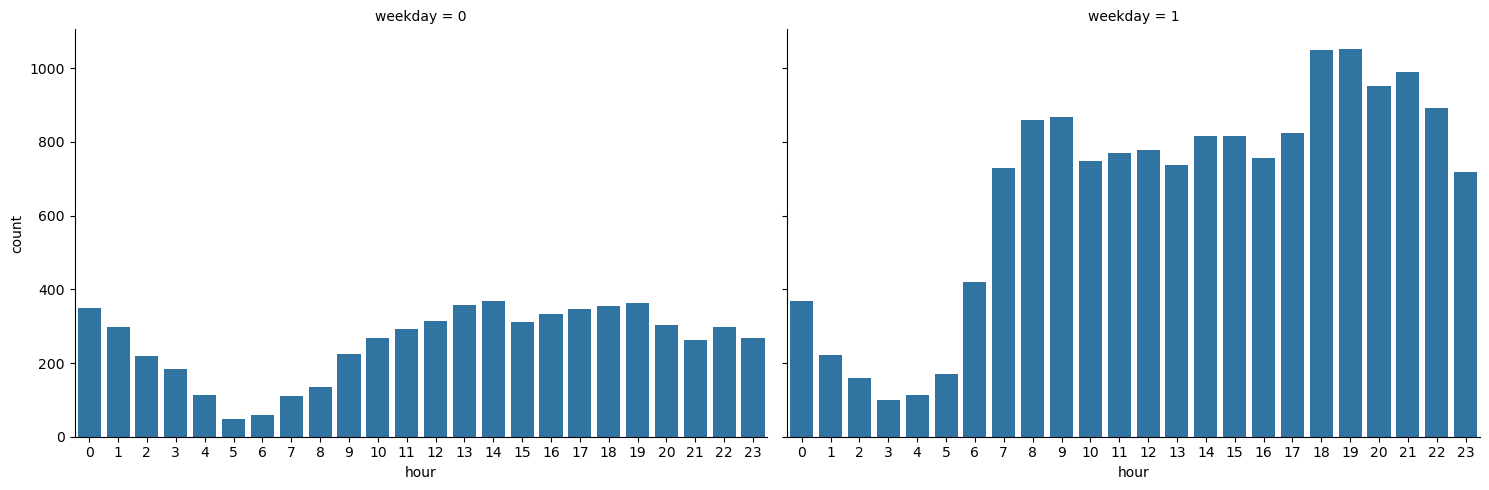

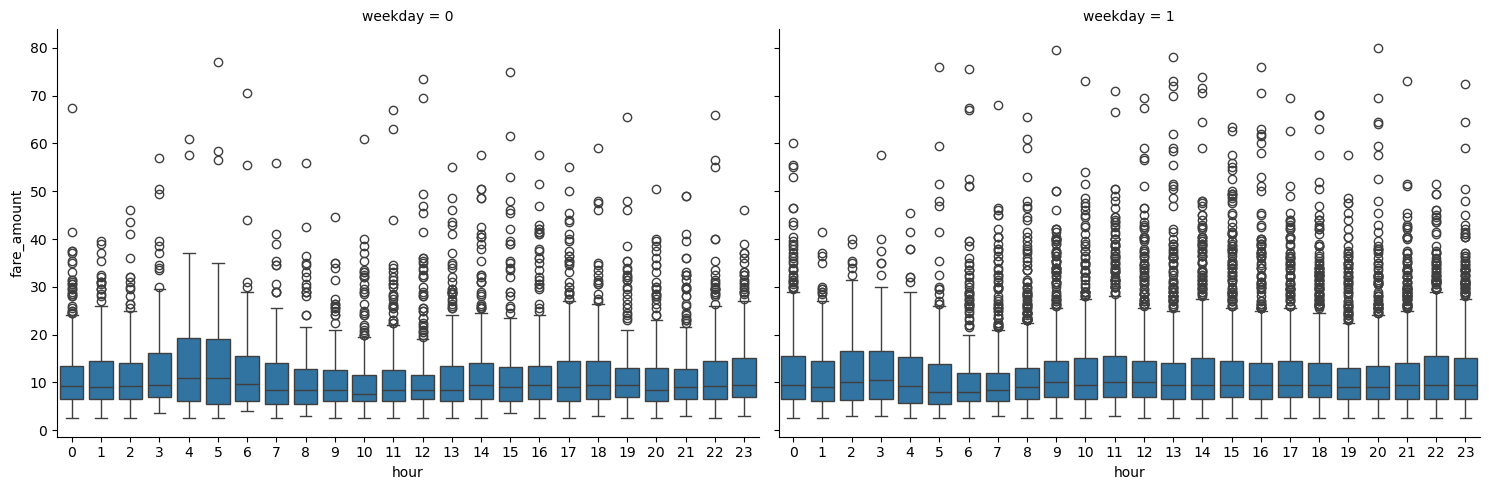

In [105]:
# create weekday column
df['weekday'] = df['day_of_week'].apply(lambda x: 0 if x in [5, 6] else 1)

# plot the number of trips
g1 = sns.FacetGrid(df, col='weekday', height=5, aspect=1.5)
g1.map(sns.countplot, "hour")
g2 = sns.FacetGrid(df, col='weekday', height=5, aspect=1.5)
g2.map(sns.boxplot, "hour", "fare_amount")

There are notable difference in number of trips in hour between weekday and weekend. For our model it might benefit to have `rush_hour` column to mark trips that happen from 6:00-10:00 or 16:00-20:00 in weekday.

In [106]:
# create rush_hour column
df['rush_hour'] = df.apply(lambda x: 1 if x['weekday'] == 1 and ((16 <= x['hour'] <= 20) | (6 <= x['hour'] <= 10) ) else 0, axis=1)

## Model construction

### Select features for model
#### Create `pre_distance` column

As we do not know `trip_distance` before the rides, let's try to calculate the distance by `PULocationID` and `DOLocationID` using the [Taxi Zone Maps Shapefile](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page) and `geopandas` package.

In [107]:
# ! pip install geopandas
import geopandas as gpd
taxi_zones = gpd.read_file('taxi_zones.zip')
taxi_zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."


In [108]:
# drop duplication in taxi_zones
taxi_zones = taxi_zones[['LocationID', 'geometry']].drop_duplicates('LocationID')

# create pickup and dropoff geometry df
PU_df = taxi_zones.merge(df['PULocationID'], left_on='LocationID', right_on='PULocationID', how='right')
DO_df = taxi_zones.merge(df['DOLocationID'], left_on='LocationID', right_on='DOLocationID', how='right')

# create pre_distance column in df
df['pre_distance'] = PU_df.distance(DO_df).values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22089 entries, 0 to 22698
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22089 non-null  int64         
 1   tpep_pickup_datetime   22089 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22089 non-null  datetime64[ns]
 3   passenger_count        22089 non-null  int64         
 4   trip_distance          22089 non-null  float64       
 5   RatecodeID             22089 non-null  string        
 6   PULocationID           22089 non-null  int64         
 7   DOLocationID           22089 non-null  int64         
 8   payment_type           22089 non-null  int64         
 9   fare_amount            22089 non-null  float64       
 10  day_of_week            22089 non-null  int32         
 11  hour                   22089 non-null  int32         
 12  trip_duration          22089 non-null  int32         
 13  weekda

In [109]:
# drop row with null pre_distance
df.dropna(inplace=True)
df.shape

(21722, 16)

<Axes: xlabel='pre_distance', ylabel='fare_amount'>

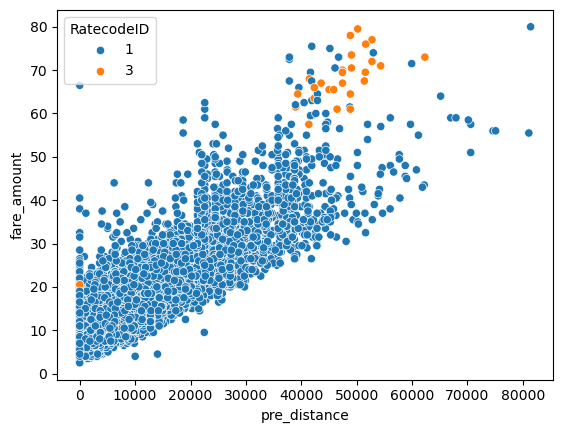

In [110]:
# create scatterplot of fare_amount and pre_distance
sns.scatterplot(df, x='pre_distance', y='fare_amount', hue='RatecodeID')

#### Identify correlations

<Axes: >

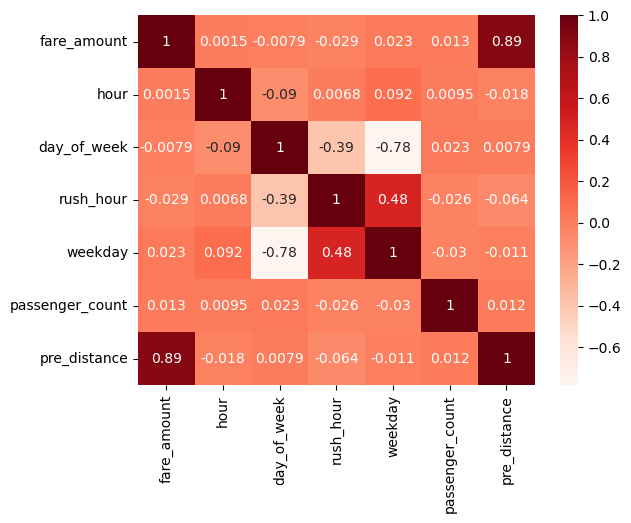

In [111]:
# create heatmap of variables
sns.heatmap(df[['fare_amount','hour', 'day_of_week', 'rush_hour', 'weekday', 'passenger_count', 'pre_distance']].corr(method='pearson'), annot=True, cmap='Reds')

Based on the correlation, we decide to choose `rush_hour`, `weekday`, `passenger_count`, and `pre_distance` as our predictors.

### Split data into outcome variable and features

In [112]:
# Split dataset into dependent/independent variables
X = df[['rush_hour', 'weekday', 'pre_distance', 'passenger_count']]
y = df['fare_amount']
X.head()

,rush_hour,weekday,pre_distance,passenger_count
0,0,0,10743.216099,6
1,0,1,6611.276599,1
2,1,1,1458.693610,1
3,0,0,6919.672451,1
4,0,0,2646.415071,1


### Split the dataset into the Training set and Test set

In [113]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Train the regression model

In [114]:
# fitting model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Evaluate model perormance

In [115]:
# on the training data
y_pred_train = lr.predict(X_train)
print('Model performance on the training data:')
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Model performance on the training data:
R^2: 0.7915509932646376
MAE: 2.6186661984045316
MSE: 15.048921768567759
RMSE: 3.8792939781057787


In [116]:
# on the testing data
y_pred_test = lr.predict(X_test)
print('Model performance on the testing data:')
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Model performance on the testing data:
R^2: 0.7905088041424065
MAE: 2.6674812692845102
MSE: 15.408245930787729
RMSE: 3.9253338623342255


[Text(0.5, 0, 'actual'), Text(0, 0.5, 'predicted')]

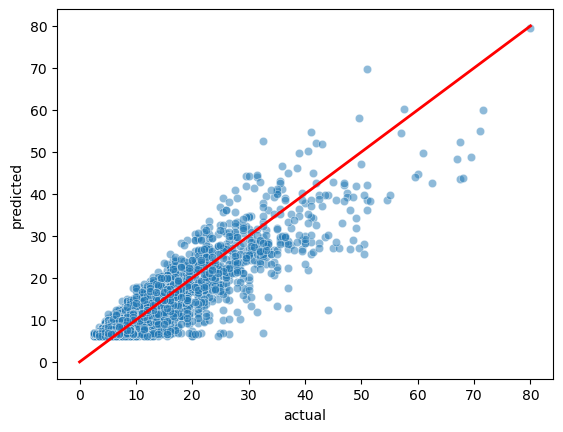

In [117]:
# visual predicted value and acutal value
ax = sns.scatterplot(x=y_test, y=y_pred_test.ravel(), alpha=0.5)
plt.plot([0,80], [0,80], c='red', linewidth=2)
ax.set(xlabel='actual', ylabel='predicted')

## Conclusion

Our model scores an RMSE of $3.92 and R^2 of 0.79, which are pretty good for a simple linear regression model. Some ideas for improvement:
- Calculate distance and duration based on the trips' actual distance and duration rather than the pure geometry distance between two location point
- Train with more data
- Construct new features or find optimal set of features
- Use a non-linear model to capture more complex relationship
- etc.